SUPPORTLYTICS (MILESTONE 1) BY **SAKTHESHWARAN T**

Step 1: Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Step 2: Load the dataset (*supportlytics.csv*)

In [2]:
df = pd.read_csv("support_tickets.csv")

Step 3: Explore the dataset using .head(), .Describe() and .info() functions

In [3]:
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Unresolved,Critical,Social media,01-06-2023 12:15,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Unresolved,Critical,Chat,01-06-2023 16:45,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     4000 non-null   int64  
 1   Customer Name                 4000 non-null   object 
 2   Customer Email                4000 non-null   object 
 3   Customer Age                  4000 non-null   int64  
 4   Customer Gender               4000 non-null   object 
 5   Product Purchased             4000 non-null   object 
 6   Date of Purchase              4000 non-null   object 
 7   Ticket Type                   4000 non-null   object 
 8   Ticket Subject                4000 non-null   object 
 9   Ticket Description            4000 non-null   object 
 10  Ticket Status                 4000 non-null   object 
 11  Ticket Priority               4000 non-null   object 
 12  Ticket Channel                4000 non-null   object 
 13  Fir

In [5]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,4000.000000,4000.000000,1950.000000
mean,2991.493250,44.204250,3.007179
std,1729.296995,15.087012,1.413106
min,1.000000,18.000000,1.000000
25%,1494.750000,32.000000,2.000000
50%,2987.000000,44.000000,3.000000
75%,4471.750000,57.000000,4.000000
max,5984.000000,70.000000,5.000000


**DATA PREPROCESSING**

Step 4: Drop the duplicate Rows

In [6]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (4000, 16)


Step 5: Count the Number of null values in the dataset and handle it using Central Tendency methods

In [7]:
# Total null values in entire dataset
total_nulls = df.isnull().sum().sum()
print("Total number of null values:", total_nulls)


Total number of null values: 4100


>Handling missing numerical values with Median to avoid the outliers

In [12]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


> Handling missing categorical values with Mode

In [13]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    if col != "Time to Resolution":
        df[col] = df[col].fillna(df[col].mode()[0])

df.loc[df["Ticket Status"] == "Unresolved", "Time to Resolution"] = np.nan

Step 6: Encoding the Ticket priority using Ordinal Encoding

In [14]:
# Ordinal encoding for Ticket Priority
priority_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Critical": 4
}

df["Priority_Score"] = df["Ticket Priority"].map(priority_map)


Step 7: Normalizing the numerical values using MinMax Normalization to fit the values between the same range.

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler for 1–10 range
scaler_1_10 = MinMaxScaler(feature_range=(1, 10))

# Columns to normalize
cols_to_normalize = [
    "Priority_Score",
    "Customer Satisfaction Rating"
]

# Apply scaling
df[cols_to_normalize] = scaler_1_10.fit_transform(df[cols_to_normalize])

In [16]:
drop_cols = [
    "Customer Name",
    "Customer Email",
]

df = df.drop(columns=drop_cols, errors="ignore")


Here is the cleaned dataset for analysis,

In [17]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score
0,1,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Unresolved,Critical,Social media,01-06-2023 12:15,NaN,5.5,10.0
1,2,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Unresolved,Critical,Chat,01-06-2023 16:45,NaN,5.5,10.0
2,3,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,01-06-2023 11:14,01-06-2023 18:05,5.5,1.0
3,4,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,01-06-2023 07:29,01-06-2023 01:57,5.5,1.0
4,5,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,01-06-2023 00:12,01-06-2023 19:53,1.0,1.0


In [18]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating,Priority_Score
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,2991.493250,44.204250,5.507875,5.564500
std,1729.296995,15.087012,2.219681,3.347184
min,1.000000,18.000000,1.000000,1.000000
25%,1494.750000,32.000000,5.500000,4.000000
50%,2987.000000,44.000000,5.500000,7.000000
75%,4471.750000,57.000000,5.500000,10.000000
max,5984.000000,70.000000,10.000000,10.000000


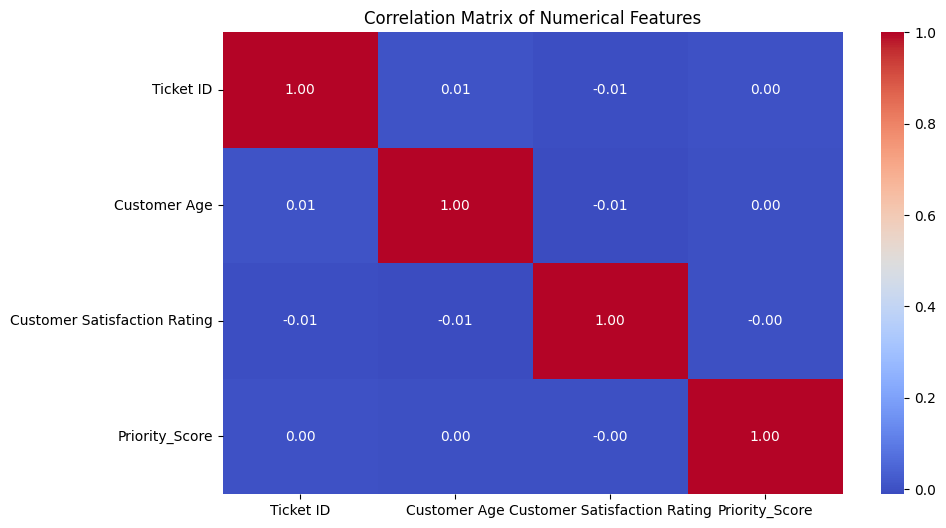

In [19]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Step 8: Perform Feature Engineering to create new feature( Resolution duration = first response time - time to solve the ticket)

In [20]:
# Convert datetime columns
df["First Response Time"] = pd.to_datetime(df["First Response Time"], format="%d-%m-%Y %H:%M")
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], format="%d-%m-%Y %H:%M")

# Create Resolution_Duration feature in HOURS
df["Resolution_Duration"] = (
    df["Time to Resolution"] - df["First Response Time"]
).dt.total_seconds() / 3600
df["Resolution_Duration"] = df["Resolution_Duration"].abs()

In [23]:
df.to_csv("cleaned_data_supportlytics.csv", index=False)

In [24]:
df.head()

,Ticket ID,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Priority_Score,Resolution_Duration
0,1,32,Other,GoPro Hero,22-03-2021,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Unresolved,Critical,Social media,2023-06-01 12:15:00,NaT,5.5,10.0,NaN
1,2,42,Female,LG Smart TV,22-05-2021,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Unresolved,Critical,Chat,2023-06-01 16:45:00,NaT,5.5,10.0,NaN
2,3,48,Other,Dell XPS,14-07-2020,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Low,Social media,2023-06-01 11:14:00,2023-06-01 18:05:00,5.5,1.0,6.850000
3,4,27,Female,Microsoft Office,13-11-2020,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Low,Social media,2023-06-01 07:29:00,2023-06-01 01:57:00,5.5,1.0,5.533333
4,5,67,Female,Autodesk AutoCAD,04-02-2020,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,Low,Email,2023-06-01 00:12:00,2023-06-01 19:53:00,1.0,1.0,19.683333


Distribution plots ( by Ticket Type, category and priority scores)

/tmp/ipython-input-3457559168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Ticket Type", palette="Set2")


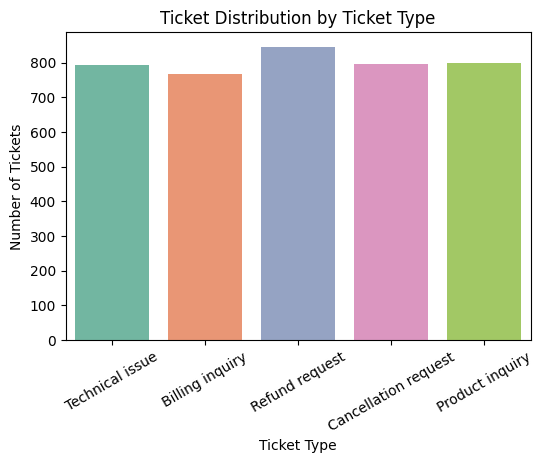

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Ticket Type", palette="Set2")
plt.title("Ticket Distribution by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-806328211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Priority_Score", palette="coolwarm")


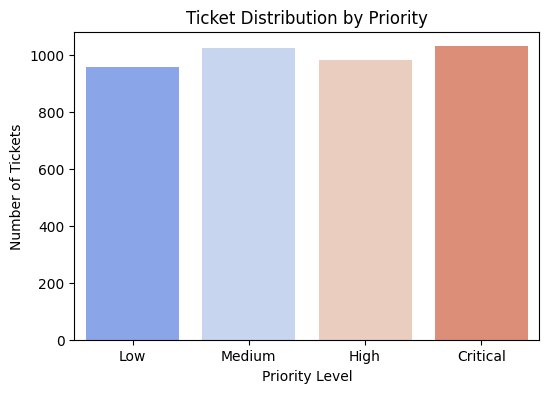

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Priority_Score", palette="coolwarm")

plt.title("Ticket Distribution by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")

# Replace x-axis labels ONLY
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Low", "Medium", "High", "Critical"]
)

plt.show()


/tmp/ipython-input-1454097142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


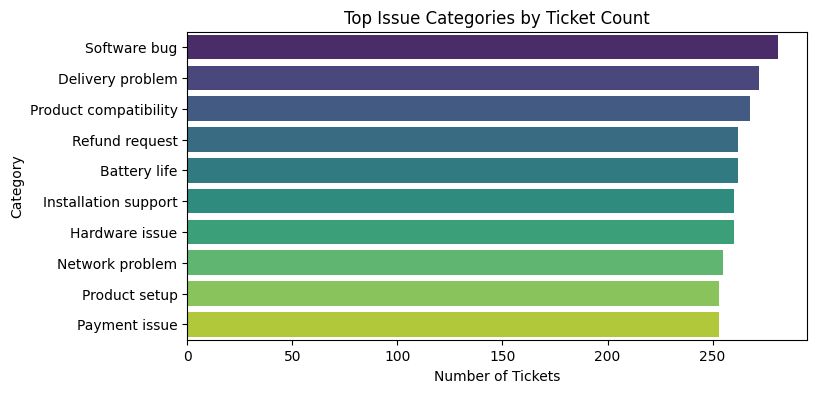

In [27]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    y="Ticket Subject",
    order=df["Ticket Subject"].value_counts().head(10).index,
    palette="viridis"
)
plt.title("Top Issue Categories by Ticket Count")
plt.xlabel("Number of Tickets")
plt.ylabel("Category")
plt.show()


**DATA DICTIONARY:**
| Attribute Name               | Data Type       | Description                                                |
| ---------------------------- | --------------- | ---------------------------------------------------------- |
| Ticket ID                    | Integer         | Unique identifier for each support ticket                  |
| Ticket Type                  | Categorical     | Nature of the support request (e.g., technical, billing)   |
| Ticket Priority              | Categorical     | Urgency level assigned to the ticket                       |
| Priority_Score               | Numeric         | Numerical encoding of ticket priority (engineered feature) |
| Ticket Status                | Categorical     | Current lifecycle status of the ticket                     |
| Ticket Channel               | Categorical     | Channel through which the ticket was raised                |
| First Response Time          | Datetime        | Timestamp of the first response provided                   |
| Time to Resolution           | Datetime        | Timestamp when the ticket was resolved                     |
| Resolution_Duration          | Numeric (Hours) | Time taken to resolve the ticket in hours                  |
| Customer Satisfaction Rating | Numeric         | Customer feedback score after resolution                   |
| Ticket Subject               | Categorical     | Short summary of the reported issue                        |
| Ticket Description           | Text            | Detailed description of the issue                          |
| Product                      | Categorical     | Product or service related to the ticket                   |


**SUMMARY:**
1. Resolution duration was engineered by calculating the time difference between first response and resolution timestamps and converting it into hours.

2. Ticket priority was transformed into a numerical priority score using ordinal encoding.

3. Missing numerical values were handled using median-based central tendency imputation.

4. Categorical attributes were cleaned and standardized to ensure consistency.

5. Priority score and customer satisfaction rating were scaled to improve interpretability and comparison.